## Mathematical model of a Neuron
<div>
<div width="50%" align="left">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/600px-Neuron.svg.png" width="40%">
</div>
<div width="50%" align="right">
<img src="https://i.stack.imgur.com/gzrsx.png" width="40%">
</div>
</div>

In the following example of Neural Networks, we will train a `Multi-Layer Perceptron` model to classify and predict the type of flowers from the Iris Dataset. Since we have only one dataset, we will train the model on 80% of the data, and test for accuracy on the remaining 20%.

We have to make sure that a model is trained on data which belong to the same distribution as that of the test data. This is because if we train on a sample from Population 1 and test the model on a sample from Population 2, we might end up with a `high variance problem`.

* `MLPClassifier` is the Python object to the Nueral Network we are going to train
* `train_test_split` divided the given dataset as per the specified `test_size`. Here, 0.2 means 20%

In [56]:
# installing packages
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install sklearn

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

<img src="https://cdn-images-1.medium.com/max/1600/0*7H_gF1KnslexnJ3s" width="80%">

## Dataset

[Iris Data Set @ UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)

#### Features:
* sepal length in cm 
* sepal width in cm 
* petal length in cm 
* petal width in cm 
* class: 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica
    
#### Objective:
Supervise a Machine Learning Model to trace patterns between the four attributes and classify them into clusters using a [Multi Layer Perceptron](https://skymind.ai/wiki/multilayer-perceptron) (Feed Forward Neural Network)

In [58]:
# reading data into a dataframe
# separating data by ","
# giving names to columns
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 sep = ",", 
                 names = ['sepal_l', 
                          'sepal_w', 
                          'petal_l', 
                          'petal_w', 
                          'class'])

# display the top 5 observations from the dataframe
df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


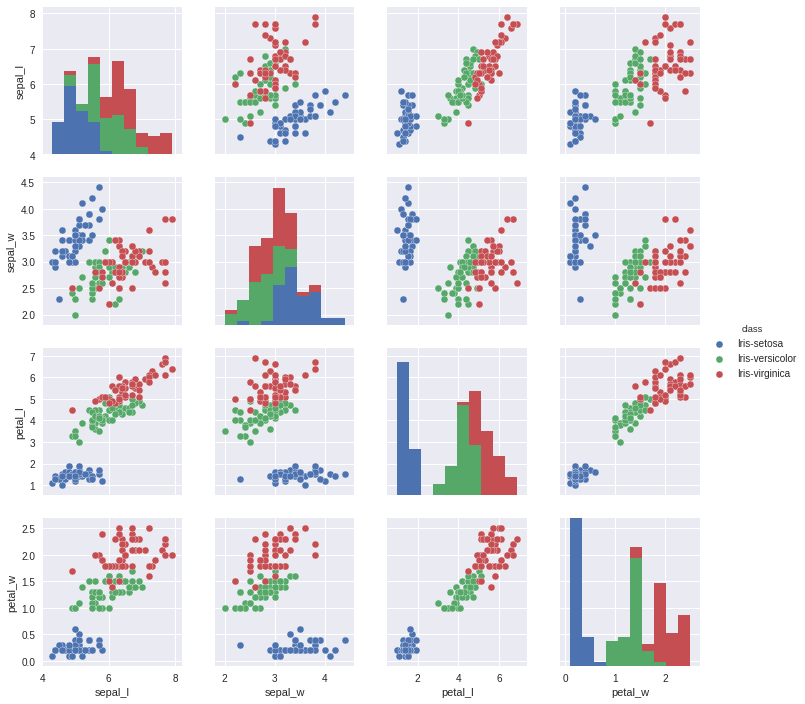

In [59]:
sns.pairplot(data = df, 
             vars = ('sepal_l',
                     'sepal_w',
                     'petal_l',
                     'petal_w'),
             hue = 'class')

The three classes of Iris available in the dataset are as follows

In [60]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Since we are trying to carry out a classification task, it would be easier for us to map the classes to a unique integer ID. Here, we have created a dictionary and used the `replace` function of Pandas.

In [61]:
# replacing "String" class names with "Integer" identifiers
iris_class = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}

df= df.replace({"class": iris_class})
df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Dividing the dataset in a Train:Test ratio of 80:20
<img src="https://cdn-images-1.medium.com/max/2000/1*-8_kogvwmL1H6ooN1A1tsQ.png" width="70%">

In [0]:
df = df.apply(pd.to_numeric)
df_array = df.values
X_train, X_test, y_train, y_test = train_test_split(df_array[:,:4], df_array[:,4], test_size=0.2)

In [63]:
print("X_train has {0} observations with {1} features".format(X_train.shape[0], X_train.shape[1]))
print("y_train has {0} class values".format(y_train.shape[0]))
print("X_test has {0} observations with {1} features".format(X_test.shape[0], X_test.shape[1]))
print("y_test has {0} class values".format(y_test.shape[0]))

X_train has 120 observations with 4 features
y_train has 120 class values
X_test has 30 observations with 4 features
y_test has 30 class values


## Building the Neural Network has never been easier!!
<img src="https://www.neuraldesigner.com/images/learning/iris_flowers_neural_network_graph.png">

## Hidden Layers
* hidden_layer_sizes = (100,) means 100 nodes in 1 hidden layer
* hidden_layer_sizes = (100, 100) means 100 nodes in 1st hidden layer & 100 nodes in 2nd hidden layer
* hidden_layer_sizes = (4, 5, 6) means 4 nodes in 1st hidden layer, 5 nodes in 2nd hidden layer and 6 nodes in 3rd hidden layer

## Activation Functions
* activation = "identity" : linear activation, f(x) = x
* activation = "logistic" : sigmoid activation, f(x) = 1 / ( 1 + exp( - x ))
* activation = "tanh" : hyperbolic activation, f(x) = tanh( x )
* activation = "relu" : rectified linear unit activation, f(x) = max( 0 , x ) 

## Solver
* solver = "sgd" : Stochastic Gradient Descent - Good for small datasets
* solver = "adam" : Adam Optimisation - Good for large datasets
* solver = "lbfgs" : Limited Memory Broyden–Fletcher–Goldfarb–Shanno - Good for small datasets

In [0]:
mlp = MLPClassifier(hidden_layer_sizes = (100,), 
                    activation = 'relu',
                    solver = 'sgd', 
                    learning_rate_init = 0.01, 
                    max_iter = 400)

In [65]:
mlp.fit(X_train, y_train)
print("Accuracy: {0}%".format(round(mlp.score(X_test,y_test), 2) * 100))

Accuracy: 97.0%


In [66]:
compare = pd.DataFrame(list(zip(X_test[:, 0], 
                                X_test[:, 1], 
                                X_test[:, 2], 
                                X_test[:, 3], 
                                y_test, 
                                mlp.predict(X_test),
                                (y_test - mlp.predict(X_test)))),
                           columns = ['sepal_l', 
                                      'sepal_w',
                                      'petal_l', 
                                      'petal_w', 
                                      'actual', 
                                      'prediction',
                                      'difference'])

compare.head()

,sepal_l,sepal_w,petal_l,petal_w,actual,prediction,difference
0,5.6,2.8,4.9,2.0,2.0,2.0,0.0
1,5.7,2.6,3.5,1.0,1.0,1.0,0.0
2,5.6,2.7,4.2,1.3,1.0,1.0,0.0
3,6.1,2.6,5.6,1.4,2.0,2.0,0.0
4,7.2,3.2,6.0,1.8,2.0,2.0,0.0


In [67]:
print("Length of TEST dataset: ", len(X_test))
print("Number of correct predictions: ", len(compare[compare['difference'] == 0.0]))

Length of TEST dataset:  30
Number of correct predictions:  29


## Testing out a few examples

In [68]:
data = np.array(
    [
        [5.8, 4.0, 1.2, 0.2],
        [3.2, 3.1, 3.2, 1.2],
        [5.4, 2.0, 2.0, 2.3],
        [6.4, 3.2, 4.5, 1.5],
        [2.3, 4.1, 4.6, 3.2]
    ]
)

for i in data:
    print(i, " -> ", mlp.predict(i.reshape(1, -1)))

[5.8 4.  1.2 0.2]  ->  [0.]
[3.2 3.1 3.2 1.2]  ->  [1.]
[5.4 2.  2.  2.3]  ->  [1.]
[6.4 3.2 4.5 1.5]  ->  [1.]
[2.3 4.1 4.6 3.2]  ->  [2.]
